# ANOVA Practice

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Time (in seconds) to find and start a workout
design_A = np.array([45, 42, 47, 44, 46, 43, 48, 45, 44, 46])  # Traditional
design_B = np.array([32, 30, 33, 31, 34, 32, 31, 33, 30, 32])  # Grid
design_C = np.array([38, 36, 39, 37, 40, 38, 37, 39, 36, 38])  # Search
design_D = np.array([35, 33, 36, 34, 37, 35, 34, 36, 33, 35])  # Personalized

In [3]:
# Check assumptions
print("Testing Normality for Each Design:")
for idx, design in enumerate([design_A, design_B, design_C, design_D]):
    stat, p_value = stats.shapiro(design)
    print(f"Design {chr(65+idx)}: p-value = {p_value:.3f}")
    # If EACH print is greater than 0.05, it means fail to reject Shapiro null hyothesis, so data is Normal Distributed 

# Test homogeneity of variances
stat, p_value = stats.levene(design_A, design_B, design_C, design_D)
print(f"\nLevene's test for equal variances: p-value = {p_value:.3f}")
# p-value > 0.05 means Fail to reject the null hypothesis of Levene's test, so variances are not significantly different / homogeneity of variances

Testing Normality for Each Design:
Design A: p-value = 0.982
Design B: p-value = 0.575
Design C: p-value = 0.575
Design D: p-value = 0.575

Levene's test for equal variances: p-value = 0.680


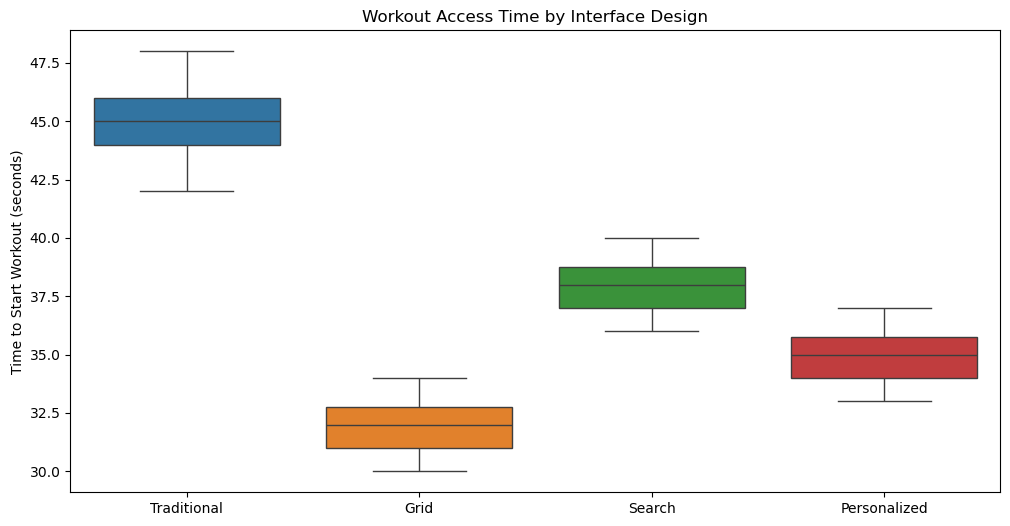

In [4]:
# Create visualization to understand distribution of completion times
# Before ANOVA
plt.figure(figsize=(12, 6))
sns.boxplot(data=[design_A, design_B, design_C, design_D])
plt.xticks([0, 1, 2, 3], ['Traditional', 'Grid', 'Search', 'Personalized'])
plt.ylabel('Time to Start Workout (seconds)')
plt.title('Workout Access Time by Interface Design')
plt.show()

In [5]:
# Perform ANOVA
# alpha = 0.05

f_stat, p_value = stats.f_oneway(design_A, design_B, design_C, design_D)
print(f_stat, p_value)

150.0468750000008 2.1130507347336007e-20


Conslusion

From our ANOVA test results, at an alpha of 0.05, we would reject the null hypothesis that there is no significant difference (p_value > alpha). There are significant differences in the time it takes a user to start a workout across our 4 different navigation interfaces. 

In [7]:
# Prepare data for Tukey's test
designs = ['Traditional Menu', 'Grid Layout', 'Search Interface', 'Personalized Feed']
all_data = np.concatenate([design_A, design_B, design_C, design_D])
labels = np.repeat(designs, [len(design_A), len(design_B), len(design_C), len(design_D)])

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(all_data, labels)
print("\nPairwise Comparisons:")
print(tukey)


Pairwise Comparisons:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
      Grid Layout Personalized Feed      3.0 0.0003  1.2408  4.7592   True
      Grid Layout  Search Interface      6.0    0.0  4.2408  7.7592   True
      Grid Layout  Traditional Menu     13.2    0.0 11.4408 14.9592   True
Personalized Feed  Search Interface      3.0 0.0003  1.2408  4.7592   True
Personalized Feed  Traditional Menu     10.2    0.0  8.4408 11.9592   True
 Search Interface  Traditional Menu      7.2    0.0  5.4408  8.9592   True
--------------------------------------------------------------------------


Tukey’s Honestly Significant Difference (HSD) test, which is a post-hoc test used after ANOVA when:

The ANOVA indicates there is a significant difference somewhere between groups

You want to know which specific group pairs differ

Based on Tukey’s post-hoc test following a significant ANOVA result, all interface design pairs showed statistically significant differences in average workout start times (p < 0.05, with most comparisons showing p < 0.001).
Notably, users navigated the Grid Layout significantly faster than all other options, especially compared to the Traditional Menu (mean difference = 13.2 seconds).

In [10]:
# Calculate effect size
def calculate_eta_squared(groups):
   all_data = np.concatenate(groups)
   grand_mean = np.mean(all_data)
   ssb = sum(len(group) * (np.mean(group) - grand_mean)**2 for group in groups)
   sst = sum((x - grand_mean)**2 for x in all_data)
   return ssb/sst


groups = [design_A, design_B, design_C, design_D]
eta_squared = calculate_eta_squared(groups)


print(f"\nEffect Size Analysis:")
print(f"Eta-squared: {eta_squared:.3f}")
print(f"Interface design explains {eta_squared*100:.1f}% of variation in start times")


Effect Size Analysis:
Eta-squared: 0.926
Interface design explains 92.6% of variation in start times


ANOVA tells you if there’s a statistically significant difference.

Effect side same as Eta-squared tells you how meaningful that difference is — i.e., how much impact the independent variable has.

0.01 small effect / 0.06 medium / 0.14 large ==> 0.926 Extremely large (Cohen benchmark)

This reflects an exceptionally large effect size, confirming that the choice of UI layout is a critical factor in user experience performance.
Given this, optimizing interface design should be a high-priority strategy for improving user efficiency and engagement.